# Check poisson assumptions

In [1]:
import src.data as data
import src.simulation as sim
import scanpy as sc
import episcanpy as epi
import anndata as ad
import seaborn as sns
import matplotlib.pyplot as plt
import src.plots as myplt

In [2]:
adata = data.load_mousebrain_window_mtx()

<br><hr><br><br><h3>QC visualization + determine filtering thresholds</h3>

In [4]:
epi.pp.qc_stats(adata, verbose=True)

added keys n_cells, log_n_cells to .var
added keys n_features, log_n_features, n_counts, log_n_counts to .obs


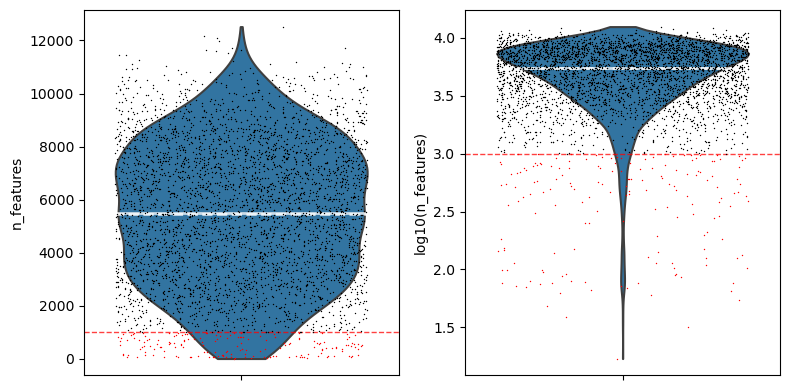

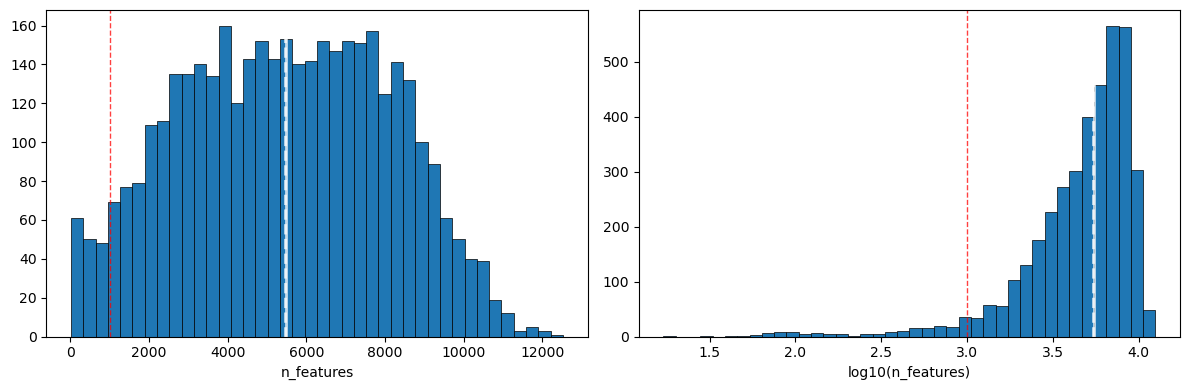

Max:	12522
Median:	5483.0
Mean:	5446.498969072165
Min:	17


In [5]:
min_features = 1000
max_features = None

epi.pl.violin(adata, "n_features", min_threshold=min_features, max_threshold=max_features, show_log=True, show_mean=True, show_median=True, print_statistics=False, save=None)
epi.pl.histogram(adata, "n_features", bins=40, min_threshold=min_features, max_threshold=max_features, show_log=True, show_mean=True, show_median=True, print_statistics=True, save=None)

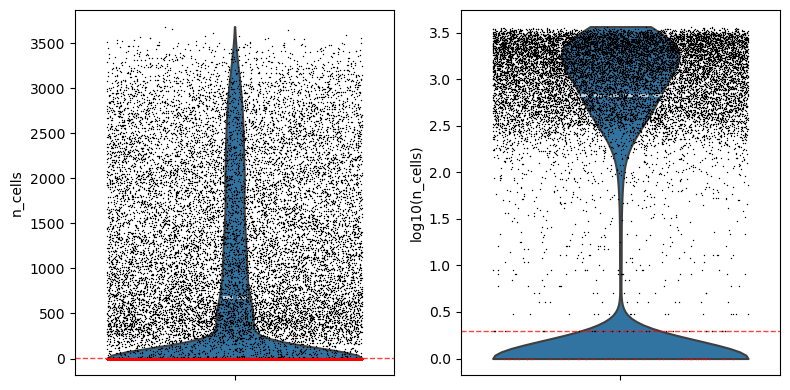

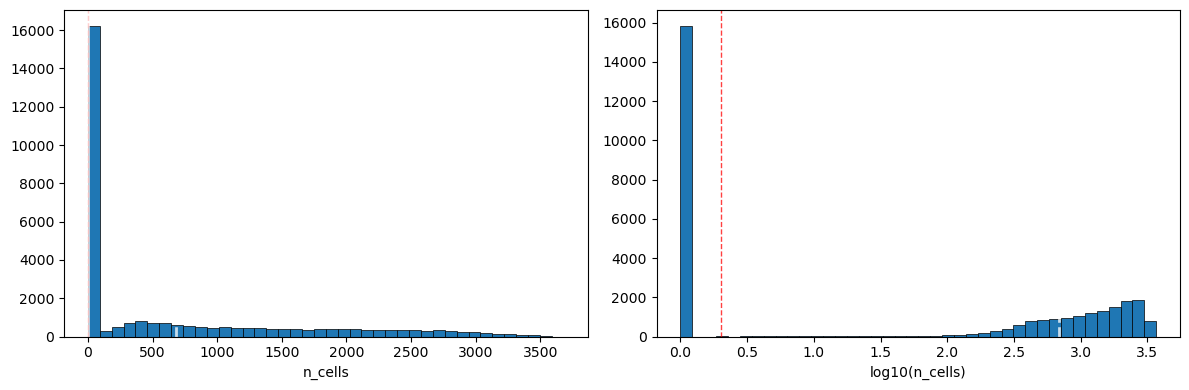

Max:	3682
Median:	0.0
Mean:	684.4063866308255
Min:	0


In [7]:
min_cells = 2
max_cells = None

epi.pl.violin(adata, "n_cells", min_threshold=min_cells, max_threshold=max_cells, show_log=True, show_mean=True, show_median=True, print_statistics=False, save=None)
epi.pl.histogram(adata, "n_cells", bins=40, min_threshold=min_cells, max_threshold=max_cells, show_log=True, show_mean=True, show_median=True, print_statistics=True, save=None)

<br><hr><br><br><h3>Set, check, and apply filters</h3>

In [8]:
epi.pp.set_filter(adata, "n_features", min_threshold=min_features, max_threshold=max_features)
epi.pp.set_filter(adata, "n_cells", min_threshold=min_cells)

3710 of 3880 observations remain (-170)
15032 of 30877 features remain (-15845)


In [11]:
adata_sim = epi.pp.apply_filters(adata, verbose=True)

3710 of 3880 observations remain (-170)
15032 of 30877 features remain (-15845)


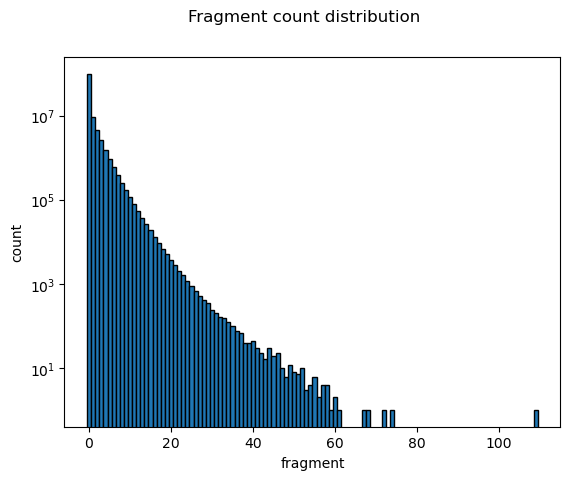

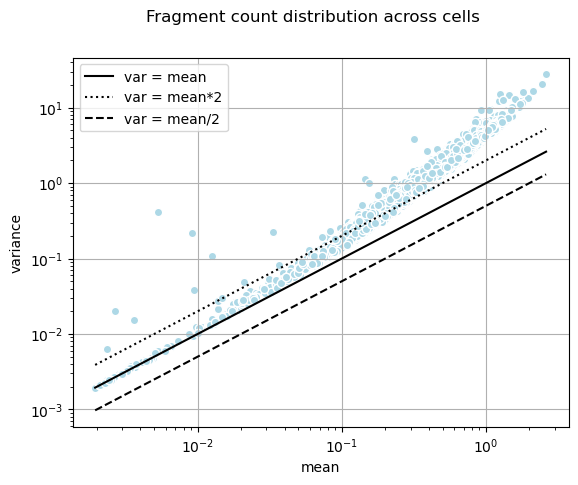

In [12]:
myplt.plot_count_distribution(adata, title='Fragment count distribution')
myplt.plot_count_mean_var(adata, title='Fragment count distribution across cells')